# 딥러닝(신경망)  Tensorfow

# 가상환경
conda create --name tf_test python anaconda activate tf_test

conda update conda conda update pip

그다음은 conda install ~~ 내가 할것들 ( 확인하는거 )

그 다음 conda install tensorflow=1.14.0

jupyter kernel install

In [2]:
import tensorflow as tf
print(tf.__version__)

C:\Users\ICT01_17\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_17\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_17\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_17\Anaconda3\envs\tf_test\lib\site-packages

1.14.0


C:\Users\ICT01_17\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_17\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_17\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_17\Anaconda3\envs\tf_t

# 분산처리

- constant - 상수
- varialbe - 변수 (가중치 저장
- placeholder - 주입변수 (외부에서 데이터 넘겨준다 - 예측한다)  : 미니배치
               

feeding 할때는 f o r문으로 한다 (반복해야해서)
               
 - 미니배치사이즈로 로 작은 데이터를 계속해서 넣어서 큰 데이터를 만든다                
 - 파일을 만들어서 Q에 집어넣는다. (데이터가 많을 때) : 큰 데이터를 q에 넣고 placeholder에 넣어준다.   
 - Q는 fifo (first in first out) 으로 데이터를 넣고 빼고 사용
               
Graph - 노드(계산하는 연산) 와 엣지(노드와 노드에서 데이터를 주고받는것 - 텐서가 처리한다)
               
텐서 : 다차원 배열    / 분산처리 가능
     : 대용량 데이터 사용하기          
               
모든 노드의 계산이 다 완료되어서 도착해야 텐서에 도착한다...               

분산처리 : 동기화 문제가 제일 중요. 
               
sesion : 연결처리

In [4]:
# 데이터 타입
import tensorflow as tf
hello = tf.constant('Hello. Tensorflow!')
# tensorflow constant, variable, placeholder 

sess = tf.Session()
print(sess.run(hello)) # tensorflow 의 데이터는 직접 확인니 불가
print(hello) # numpy 데이터로 변경  : tensorflow 에서 실행되고 그 결과는 numpy로 보여진다

b'Hello. Tensorflow!'
Tensor("Const:0", shape=(), dtype=string)


In [8]:
# 이름 - 메모리 저장

x = tf.constant(35, name = 'x')  
# x 라는 이름을 주는 이유
# 모델의 그라프 구조 확인
# 모델을 그대로 저장(가중치) 할 때 메모리 위치를 확인하기 위해서
y = tf. Variable(x + 5, name = 'y') # 변수가 있는 경우 - 반드시 초기화를 해준다

print(y)

# 메모리 위치를 저장할 수 없다 (윈도우가 저장한다) 대신 이름을 저장해 놓으면 tensorflow 가 이름과 위치를 연결해서 저장한다. 
# 그래서 나중에 이름을 불러오면 된다. 

<tf.Variable 'y:0' shape=() dtype=int32_ref>


In [9]:
# 초기화  
model = tf.global_variables_initializer()  # 변수 초기화
# --------------------- 여기까지 모델 만들기 -------------------

# 학습 시키는 과정
with tf.Session() as session :    # 모델 돌리기
    session.run(model)
    print(session.run(y))

40


In [10]:
# 팬다스에서 데이터 초기화 (list, dict) # 요소끼리 계산 (배열연산)
a = tf.constant([1,2,3], name = 'a')  # GPU 공간
b = tf.constant([4,5,6], name = 'b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

[5 7 9]


# Graph

In [12]:
# 1. 골결만들기
# 자료구조: Graph로 구성 - 골결(구조) 형성

a = tf.placeholder(tf.int16) # 데이터 없이 공간만 확보
b = tf.placeholder(tf.int16)
add = tf.add(a,b)
mul = tf.multiply(a,b)
total = tf.multiply(add, mul)  # add, totla 이 들어와야 할수 있다

In [14]:
# 2. 호줄하기
# with 안에서 sess 이라는 이름으로 돌리고 끝나면 자동으로 초기화 

with tf.Session() as sess:
#    print("feed 변수합 : %i" % sess.run(add, feed_dict = {a:2, b:3})) # 데이터 주입 호출 add
#    print("feed 변수곱 : %i" % sess.run(mul, feed_dict = {a:2, b:3}))
    print("feed 변수곱 : %i" % sess.run(total, feed_dict = {a:2, b:3}))  # 위에 add, mul 없어도 total 만 호출해도 호춯된다 
    
    
# graph 구조로 연결되서 run으로 호출된다 

feed 변수곱 : 30


# matrix multiply

In [22]:
matrix1 = tf.constant([[3.,3.]]) # 1X2
matrix2 = tf.constant([[2.],[2.]]) # 2X1 => 1x1
product = tf.matmul(matrix1, matrix2)   # matrix multiply
# product에는 결과가 들어가있지 않는다. 
# session 에 서 실행되고  run 에서 출력한다

with tf.Session() as sess:  # 실행부
    result = sess.run(product)
    print(result)

[[12.]]


In [23]:
zeros = tf.zeros([2,2])   # 0로 만듬
ones = tf.ones([6])   # 1로 만듬
# 균등분포
uniform = tf.random_uniform([3,3,3], minval = 0.0, maxval = 10)
# 정규분포
normal = tf.truncated_normal([2,2], mean = 0.0, stddev = 2.0)
# 표준편차 2배냐의 것으로 초기화
trunc =tf.truncated_normal([2,2], mean = 5.0, stddev = 1.0)
random_var = tf.Variable(tf.truncated_normal([2,2]))

In [24]:
init = tf.global_variables_initializer()
sess = tf.Session()
print(sess.run(trunc))

sess.run(init) # 변수초기화
print("변수초기화", sess.run(random_var))

[[5.626925  6.006896 ]
 [4.7371492 4.5674567]]
변수초기화 [[-0.13445058  1.0250793 ]
 [ 0.2185448   0.28938532]]


In [28]:
import tensorflow as tf
my_tensor = tf.constant(0, shape = [6,2])  # 6X2 행렬 => 값을 바꿀수 없는 상수화
my_static_shape = my_tensor.get_shape()
print(type(my_static_shape))  # class
print(my_static_shape)   # 내용은 run으로 확인. 차수는 get_shape 함수로 확인

# 전치하기
my_tensor_transposed = tf.transpose(my_tensor)
print(my_tensor_transposed.get_shape())

<class 'tensorflow.python.framework.tensor_shape.TensorShape'>
(6, 2)
(2, 6)


In [30]:
import tensorflow as tf
tf.InteractiveSession()  # 대화형 세션
tf.zeros(2)
a = tf.zeros(2)
print(a.eval())  #  대화형 세션을 사용할땐 eval을 사용해서 출력 (run 을 안써도 된다. )

[0. 0.]


In [36]:
def showvalue(t):
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    print(t.eval())
    sess.close()

In [37]:
c2, c3 = tf.constant([1.2, 5.6]), tf.constant([-4,-1,7])
v2, v3 = tf.constant([2.3, 4.5]), tf.constant([-2,3,5])
showvalue(tf.add_n([c2, v2]))
showvalue(tf.add_n([c3, v3, v3]))  # 여러개가 가능핟ㅎㅀㄱ

[ 3.5 10.1]
[-8  5 17]


In [ ]:
#  2x + y + z = 1
#  4x + 3y + 4z = 2
# -4x + 2y + 2z = -6

# A dot x = [1,2,-6]   # 행렬 나누기 => 역행렬
        y  
        z
# 3x3  3x1  => 3x1

In [49]:
sess= tf.Session()
x = tf.constant([2.0, 1.0, 1.0, 4, 3, 4, -4, 2 ,2], shape=[3, 3])
print(sess.run(x))

y= tf.constant([1.0, 2, -6], shape=[3, 1])
print('\n',sess.run(y))

# 역행렬 ( 행렬 )
z = tf.matrix_solve( x, y) # 앞에 오는 매개변수 x의 역행렬을 구하고 y 에 행렬곱을 해줌
result =sess.run(z)
print('\n\n',"계수", result)
print('\n',sess.run(z))

print('\n\n\n')
print( 2.0 * result[0] + 1.0 * result[1] + 1.0 * result[2])

print()
print(sess.run(tf.matmul(x,z)))

[[ 2.  1.  1.]
 [ 4.  3.  4.]
 [-4.  2.  2.]]

 [[ 1.]
 [ 2.]
 [-6.]]


 계수 [[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]

 [[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]




[1.0000001]

[[ 1.0000001]
 [ 2.       ]
 [-6.000001 ]]


In [50]:
# matrix_inverse = matrix_solve

x_1 = tf.matrix_inverse(x)
z = tf.matmul(x_1, y)
print("해 :", sess.run(z))

해 : [[ 1.0000002]
 [-2.0000005]
 [ 1.0000002]]


singular value decomposition

In [54]:
# 특이행렬분해 (singular value decomposition) : 정방행렬이 아닐경우 가능 (행렬이 다를 때)
# PCA 할 때 -  고유값분해 eigenvalue + eigenvector : 정방행렬 (행과열의 같은 행렬)

a = tf.constant([1,2,3,4,5,6], shape = [2,3])
a = tf.to_float(a)
# 행과 열의 특징을 별도로 뽑음
# 정방행렬
# truncate : 
s,u,v = tf.svd(a)  # singular value 이럴때는 3개로 나눠준다 => u (2x2), s(1X2), v(3x2)

# ㄴs 는 u,v 를 연결시킨다..

print(sess.run(s));print()
print(sess.run(u));print()
print(sess.run(v))

[9.508034   0.77286935]

[[-0.38631773 -0.92236584]
 [-0.92236584  0.38631773]]

[[-0.42866713  0.8059641 ]
 [-0.56630695  0.1123824 ]
 [-0.70394677 -0.58119917]]


In [55]:
diagonal = [1,2,3,4]
dia = tf.diag(diagonal) # 대각행렬 -> one-hot-encoding
print(sess.run(dia))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [65]:
print(sess.run(tf.diag_part(dia)))
print(sess.run(tf.trace(dia)))   # 대각요소의 값을 더해줌

[1 2 3 4]
10


In [66]:
import numpy as np
a = tf.constant([1,2,3,4,5,6], shape = [2,3])
b = tf.constant([7,8,9,10,11,12], shape = [3,2])
c = tf.matmul(a,b)
sess.run(c)  # 2x2

array([[ 58,  64],
       [139, 154]])

In [67]:
# 행렬: 행과 열을 확인하고 앞의 것은 개수 어떻게 층을 이루고 있는가 를 얘기한다
# [2,2,2, 2,3] => 2*2*2 해서 2x3 행렬이 8개. 
a = tf.constant(np.arange(1,13, dtype = np.int32), shape= [2,2,3])  # 2,3 만 판단  (2x3이 2개 있다는 뜻) # 행렬을 중심으로 하고 데이터 표현
print(sess.run(a))                                                  # 위아래 두개만 맞춰주면 곱하기 가능 ? 

b = tf.constant(np.arange(13,25, dtype = np.int32), shape = [2,3,2])# 3,2 만 보기 
print(sess.run(b))

c = tf.matmul(a,b)
sess.run(c)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
[[[13 14]
  [15 16]
  [17 18]]

 [[19 20]
  [21 22]
  [23 24]]]


array([[[ 94, 100],
        [229, 244]],

       [[508, 532],
        [697, 730]]])

In [70]:
# 문제()

a = tf.constant(np.arange(1,25, dtype = np.int32), shape= [2,2,2,3]) 
print(sess.run(a));print()                                                    

b = tf.constant(np.arange(25,49, dtype = np.int32), shape = [2,2,3,2])
print(sess.run(b));print()  

c = tf.matmul(a,b)
sess.run(c)

# 2x2x2
# 2x2 => 4개

[[[[ 1  2  3]
   [ 4  5  6]]

  [[ 7  8  9]
   [10 11 12]]]


 [[[13 14 15]
   [16 17 18]]

  [[19 20 21]
   [22 23 24]]]]

[[[[25 26]
   [27 28]
   [29 30]]

  [[31 32]
   [33 34]
   [35 36]]]


 [[[37 38]
   [39 40]
   [41 42]]

  [[43 44]
   [45 46]
   [47 48]]]]



array([[[[ 166,  172],
         [ 409,  424]],

        [[ 796,  820],
         [1093, 1126]]],


       [[[1642, 1684],
         [1993, 2044]],

        [[2704, 2764],
         [3109, 3178]]]])

In [79]:
# a를 제곱한다면 : 자기자신을 제곱하려면 전치

d = tf.matmul(a, tf.transpose(a, perm = [0,1,3,2]))
print(sess.run(d))
print()

# 다른방법 (같은결과)
# d2 = tf.matmul(a,a, transpose_b = True)  # 전치해서 자기 제곱
# print(sess.run(d2))

[[[[  14   32]
   [  32   77]]

  [[ 194  266]
   [ 266  365]]]


 [[[ 590  716]
   [ 716  869]]

  [[1202 1382]
   [1382 1589]]]]



In [80]:
                           # 0 1 2 
x = tf.constant([[[1,2,3], # 2x2x3  => 제곱이 되려면 2x3x2 (전치:행과열바꿈) <- 순서 : 0 2 1
                [4,5,6]],
               [[7,8,9],
                [10,11,12]]])
print(sess.run(tf.shape(x)))
sess.run(tf.transpose(x)) # 3x2x2 => 순서 : 2 1 0 (디폴트값 : 면과 열이 바뀜)


 # 0:면, 1: 행, 2 : 열 , 4: ..

[2 2 3]


array([[[ 1,  7],
        [ 4, 10]],

       [[ 2,  8],
        [ 5, 11]],

       [[ 3,  9],
        [ 6, 12]]])

In [81]:
y = tf.transpose(x, perm=[0,2,1])
sess.run(tf.transpose(y))

array([[[ 1,  7],
        [ 2,  8],
        [ 3,  9]],

       [[ 4, 10],
        [ 5, 11],
        [ 6, 12]]])

In [84]:
sess.run(tf.matmul(x, tf.transpose(x,perm = [0,2,1])))

array([[[ 14,  32],
        [ 32,  77]],

       [[194, 266],
        [266, 365]]])

In [85]:
# 6차원 만들기

t = [1,2,3,4,5,6]
t = tf.reshape(t,[1,2,1,3,1,1])   # 1 은 차수를 높이는것 뿐... 2,3 만있으면 6개가 되니까..
sess.run(t)

# [1,2,1,3,1,1]
     2라서 []가 4개
    
# [] 하나면 열, [[]] 두개면 행, [[[]]] 세개면 면.   그리고 2세트라서 마지막 [] 한개 더

array([[[[[[1]],

          [[2]],

          [[3]]]],



        [[[[4]],

          [[5]],

          [[6]]]]]])

In [86]:
print("t의 차원은", sess.run(tf.shape(t)))

t의 차원은 [1 2 1 3 1 1]


In [87]:
print("차원의 수를 축소할 때", sess.run(tf.shape(tf.squeeze(t))))

# [1 2 1 3 1 1] 에서 요소가 1인것들은 다 삭제 해서 2,3 만 남음

차원의 수를 축소할 때 [2 3]


In [94]:
# reshape에서  - (마이너스)의 의미

tensor = [1,2,3,4,5,6,7,8,9,10,11,12]

print(sess.run(tf.reshape(tensor, [2,-1]))) # - : 계산으로 채워라

print()
tf.reshape(tensor, [-1,6]) # 
print(sess.run(tf.reshape(tensor, [2,-1,3]))) # ..? 2가 들어간다

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [91]:
# t: 1,1,2,1,3,1
print(tf.expand_dims(t,0))  # 차원 확대  (뒤에 1 이 더 추가됨)

Tensor("ExpandDims:0", shape=(1, 1, 2, 1, 3, 1, 1), dtype=int32)


In [95]:
# padding 충전재
t = [[1,2,3], [4,5,6]]  # 2x3 => 4x7
paddings = [[1,1,],[2,2]]   # 행을 위에 한개, 아래에 한개,  열을 왼쪽에 2개, 오른쪽에 2개
print(sess.run(tf.pad(t,paddings, "CONSTANT")))  # constant :0 으로 채워라

[[0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 0 0 0 0 0]]


In [96]:
paddings = [[1,1,],[1,1]]  # 4x5
print(sess.run(tf.pad(t,paddings, "REFLECT")))

# 가운데 1,2,3
#        4,5,6 중심으로 반사로 123이 아래로 456이 위로

[[5 4 5 6 5]
 [2 1 2 3 2]
 [5 4 5 6 5]
 [2 1 2 3 2]]


In [99]:
print(sess.run(tf.pad(t,paddings, "SYMMETRIC")))

# 가운데 중심으로 위로 같은거 아래로 같은거

[[1 1 2 3 3]
 [1 1 2 3 3]
 [4 4 5 6 6]
 [4 4 5 6 6]]


# 방정식 해 풀기

다차원 방정식의 해
  - 무작위 대입법
  - 역행렬을 구함
  - 입출력 데이터만 : 계수 결정 (가중치 학습을 통해서 학습)


In [100]:
# 데이터로부터 규칙을 발견 => 분류와 예측을 하기 위해서

import numpy as np
import tensorflow as tf

# 데이터 생성 => minibatch => feeding 해주기
x_data = np.random.rand(100).astype(np.float32) # 랜덤으로 
y_data = x_data * 0.1 + 0.3   # 선형방정식 으로 만듬 (어떻게 0.1, 0.3 을 알아냈는지 알아보자)
len(y_data)

100

In [124]:
# 가중치와 bias
# 가중치 : 설명력
# bias : activation 결정 (어떤 기준치를 정해줘서 그 이상, 이하 활성화)
# 가중치에는 꼭 바이어스가 한개씩 결합한다

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # 균등분포 (uniform) 으로 초기화
b = tf.Variable(tf.zeros([1]))  # bias(바이어스)
sess = tf.Session()

# 수식 만들기
# 가중치 * x_data + bias 
y = W * x_data + b   # 예측

In [125]:
# loss function : MSE : 2차원인 경유 포물선을 이루고 최적점은 한개 

loss = tf.reduce_mean(tf.square(y - y_data))  # (예측치 - 실제) 제곱해서 reduce: 합해서 mean : 평균을 내라


# 경사하강법 : GradientDescentOptimizer
# 기울기 : 미분을 이용해서 - 이면 가중치에 차를 더해주고 
#                          + 이면 가중치에 감하는 연산
optimizer = tf.train.GradientDescentOptimizer(0.5)  # learningrate : 학습률 (0.5)
train = optimizer.minimize(loss)  #  minimize : 최적화 (MSE가 가장 작게하는 값으로 해라)
# 여기까지가 작업할 graph 완성


init = tf.global_variables_initializer()  # 세션을 실행하기 전에만(순서 상관없음) 초기화 해주면 된다.  <- 하나의 빈 칸을 만들고 값들 넣어주기
sess.run(init)  # 초기화 (variable 에 있는 가중치를)



for step in range(201):  # 200번 회전
    sess.run(train)
    if step % 20 == 0:   # 20번 마다 출력
        print(step, sess.run(W), sess.run(b))  # x_data * 0.1 + 0.3
        
# y 수식으로 실행

0 [0.15862174] [0.39314353]
20 [0.10093172] [0.29945713]
40 [0.10026722] [0.29984432]
60 [0.10007663] [0.29995537]
80 [0.10002198] [0.2999872]
100 [0.10000629] [0.29999635]
120 [0.10000182] [0.29999897]
140 [0.10000053] [0.2999997]
160 [0.10000015] [0.29999992]
180 [0.10000014] [0.29999992]
200 [0.10000014] [0.29999992]


# placeholder
주입변수로 데이터 받기

In [126]:
# 주입변수로 데이터 받기

x = tf.placeholder(tf.float32, name = 'x')
y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # 균등분포 (uniform) 으로 초기화
b = tf.Variable(tf.zeros([1]))
sess = tf.Session()
y_model = W * x + b  # 예측


loss = tf.reduce_mean(tf.square(y_model - y)) 

optimizer = tf.train.GradientDescentOptimizer(0.5) 
train = optimizer.minimize(loss) 

init = tf.global_variables_initializer() 
sess.run(init)

for step in range(201): 
    sess.run(train, {x :x_data, y: y_data})
    if step % 20 == 0: 
        print(step, sess.run(W), sess.run(b))


0 [0.00429481] [0.52927715]
20 [0.05090631] [0.3286045]
40 [0.08592021] [0.3082036]
60 [0.09596199] [0.30235276]
80 [0.09884192] [0.30067477]
100 [0.09966787] [0.30019352]
120 [0.09990475] [0.3000555]
140 [0.09997267] [0.30001593]
160 [0.09999216] [0.30000457]
180 [0.09999775] [0.30000132]
200 [0.09999937] [0.30000037]


In [127]:
predicted = sess.run(y_model, {x:[i for i in range(100)]})

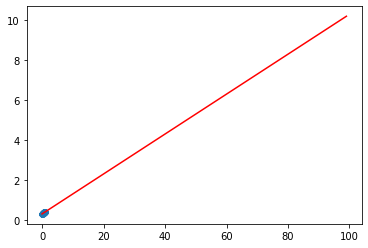

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o', markersize = 5)
plt.plot(predicted, 'r')
plt.show()


# TensorBoard

In [141]:
from tensorflow.python.framework import ops
import os
ops.reset_default_graph()

In [142]:
sess = tf.Session()
x_vals = np.array([1., 3., 5., 7., 9.]) # float 때문에 1., 3., 이렇게 씀 ( 메모리 작게 하기위해)
y_vals = np.array([1., 3., 5., 7., 9.])
x_data = tf.placeholder(tf.float32)
y_data = tf.placeholder(tf.float32)

# m = tf.constant(3.)
prod = tf.multiply(x_data, y_data)

for x_val in x_vals:
    print(sess.run(prod, feed_dict = {x_data: x_vals, y_data: y_vals}))
    

[ 1.  9. 25. 49. 81.]
[ 1.  9. 25. 49. 81.]
[ 1.  9. 25. 49. 81.]
[ 1.  9. 25. 49. 81.]
[ 1.  9. 25. 49. 81.]


In [143]:
merged = tf.summary.merge_all()
if not os.path.exists("c://tmp/tensorboard_logs/"):
    os.makedirs('c://tmp/tensorboard_logs/')
    
my_writer = tf.summary.FileWriter('c://tmp/tensorboard_logs/', sess.graph)

# 그다음 아나콘다 cmd에서
# tensorboard --logdir=/tmp 입력 후 
# 크롬에서 localhost:6006  ( 주소 )

In [153]:
import numpy
rng = numpy.random

# 상수화 할 때  ( 수정할게 줄어들거 쉽게 고칠수 있다)
learning_rate = 0.01
training_epochs = 4000
display_step = 50

train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]) 

In [154]:
# data point : 관측치
# 변수개수를 결정
n_samples = train_X.shape[0] # 차수: 행(3,4) : 인덱스 접근
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(rng.randn(), name = "weight")  # 가중치 : 설명
b = tf.Variable(rng.randn(), name = "bias" )  # 바이어스 :  activation 활성화
activation = tf.add(tf.multiply(X, W), b)     # 수식  y = ax + b
# activation 이 node, X W b 가 edge

# minibatch 사이즈를 맞추려고 2로 나눠준다
# 여기서는 sum을 사용하니까 (위에서는 loss에서는 mean 사용) 2로 나눠서 mean과 같은 값
cost = tf.reduce_sum(tf.pow(activation-Y,2))/(2*n_samples) # activation : 예측치, Y : 실제값 // pow : power (2: 제곱, 3:세제곱. 내가 정한대로)


# 역전파 : optimizer도  hyper parameter 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # hyper parameter  # momentum : 가던방향을 고려해서 
init = tf.initialize_all_variables()


Epoch: 0001 cost=  3.736197 W= 0.6998162 b= 0.5005586
Epoch: 0051 cost=  0.083944 W= 0.2963959 b= 0.46477383
Epoch: 0101 cost=  0.083138 W= 0.2936123 b= 0.4847995
Epoch: 0151 cost=  0.082425 W= 0.29099417 b= 0.50363296
Epoch: 0201 cost=  0.081794 W= 0.28853202 b= 0.52134615
Epoch: 0251 cost=  0.081237 W= 0.28621614 b= 0.5380064
Epoch: 0301 cost=  0.080744 W= 0.28403795 b= 0.5536757
Epoch: 0351 cost=  0.080308 W= 0.28198934 b= 0.5684136
Epoch: 0401 cost=  0.079922 W= 0.2800625 b= 0.5822751
Epoch: 0451 cost=  0.079581 W= 0.27825028 b= 0.59531265
Epoch: 0501 cost=  0.079280 W= 0.27654582 b= 0.60757434
Epoch: 0551 cost=  0.079013 W= 0.27494282 b= 0.6191061
Epoch: 0601 cost=  0.078778 W= 0.27343526 b= 0.6299508
Epoch: 0651 cost=  0.078570 W= 0.27201745 b= 0.6401505
Epoch: 0701 cost=  0.078386 W= 0.27068394 b= 0.6497438
Epoch: 0751 cost=  0.078223 W= 0.26942977 b= 0.65876627
Epoch: 0801 cost=  0.078079 W= 0.26825014 b= 0.6672527
Epoch: 0851 cost=  0.077952 W= 0.2671406 b= 0.67523444
Epoch: 0

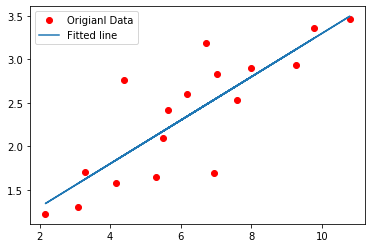

In [155]:
# 그라프 정의 :  node( 연산) + edge(데이터전달 : tensor(배열+행렬))
# 전제조건 : GPU 가 존재 => 네트워크로 연결(cpu & gpu)
# session 연결 : 실행한다.
with tf.Session() as sess: # 실행부
    sess.run(init)  # 실행되면 초기화시키고
    for epoch in range(training_epochs):  # 반복횟수 (세대)
        
        # 미니배치 ( 데이터 하나씩 넣고 있다)
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict = {X: x, Y:y})
        
        # cost :비용함수 (점점 감소해야한다 : 우하향)  // accuracy는 증가함수
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:9f}".format(sess.run(cost, feed_dict={X:train_X, Y: train_Y})), 
                 "W=", sess.run(W), "b=", sess.run(b)) # 수렴값
    print("최적화 종료")
    print("cost=", sess.run(cost, feed_dict={X:train_X, Y: train_Y}),"W=", sess.run(W), "b=", sess.run(b)) 
    
    plt.plot(train_X, train_Y, 'ro', label = "Origianl Data")
    # predict 한 결과값 출력
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label = 'Fitted line')
    plt.legend()
    plt.show()

In [156]:
# tensor -> 직접 시각화하는 것이 불가능 => numpy 포멧으로 변경해서 시각화
import tensorflow as tf

def run_variable(variable):
    tf.global_variables_initializer()
    with tf.Session() as sess:
        return sess.run(variable)

In [162]:
my_distraibution = tf.random_uniform((600,400), seed = 42) # 24  # 데이터 갯수에 따라서 균등분포가 되기도 하고 아니기도 하다
uniform = run_variable(my_distraibution)

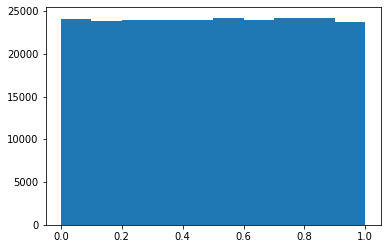

In [163]:
from matplotlib import pyplot as plt
plt.hist(uniform.flatten())  # flatten : 데이터의 메모리 저장 : 1차원으로 *******
plt.show()

In [ ]:
# activation 함수 : 활성화 함수 :  회귀냐 분류인가를 결정
 - 비선형 매핑 (선형대수 -> 비선형문제로 변경)
 - 가중치를 깊게하고 활성화함수 매핑으로 XOR 문제를 해결
 - 그라프를 꼭 리셋해줘야 사용가능하다. 

In [165]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

x_vals = np.linspace(start = -10, stop = 10, num = 100)
print(x_vals)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

[ 0.  3. 10.]
[0.26894143 0.5        0.7310586 ]
[-0.7615942  0.         0.7615942]
[-0.63212055  0.          1.        ]
[-0.9999546  -0.99994444 -0.999932   -0.99991677 -0.99989814 -0.99987534
 -0.99984743 -0.99981327 -0.99977147 -0.99972031 -0.99965769 -0.99958106
 -0.99948727 -0.99937248 -0.999232   -0.99906006 -0.99884964 -0.9985921
 -0.99827691 -0.99789116 -0.99741905 -0.99684124 -0.99613408 -0.99526861
 -0.99420938 -0.99291301 -0.99132643 -0.98938465 -0.98700817 -0.98409965
 -0.98053999 -0.97618343 -0.97085155 -0.96432601 -0.95633957 -0.94656519
 -0.9346026  -0.9199619  -0.90204355 -0.88011378 -0.85327452 -0.82042669
 -0.78022512 -0.73102351 -0.67080701 -0.59710968 -0.50691352 -0.3965249
 -0.26142329 -0.0960761   0.1010101   0.3030303   0.50505051  0.70707071
  0.90909091  1.11111111  1.31313131  1.51515152  1.71717172  1.91919192
  2.12121212  2.32323232  2.52525253  2.72727273  2.92929293  3.13131313
  3.33333333  3.53535354  3.73737374  3.93939394  4.14141414  4.34343434
  4.

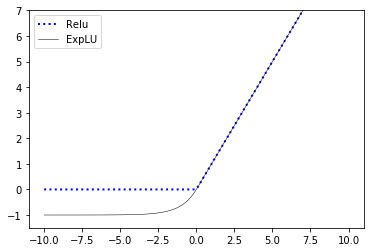

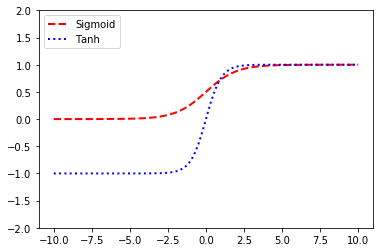

In [168]:
print(sess.run(tf.nn.relu([-3., 3., 10.]))) # 0 ~ 00 (무한대)
y_relu =sess.run(tf.nn.relu(x_vals))

print(sess.run(tf.nn.sigmoid([-1.,0.,1.])))  # 0 ~ 1
y_sigmoid = sess.run(tf.nn.sigmoid(x_vals))

print(sess.run(tf.nn.tanh([-1.,0.,1.]))) # -1 ~1
y_tanh = sess.run(tf.nn.tanh(x_vals))

print(sess.run(tf.nn.elu([-1., 0., 1.]))) # -1 ~ 00 무한대까지 수정본
y_elu = sess.run(tf.nn.elu(x_vals))
print(y_elu)

print(sess.run(tf.nn.softplus([-1., 0., 1.]))) # 각진 단점 보완 (relu 보완)
y_softplus = sess.run(tf.nn.softplus(x_vals))

plt.plot(x_vals, y_relu, 'b:', label='Relu', linewidth=2)
plt.plot(x_vals, y_elu, 'k-', label='ExpLU', linewidth=0.5)
plt.ylim([-1.5, 7])
plt.legend(loc='upper left')
plt.show()

plt.plot(x_vals, y_sigmoid, 'r--', label='Sigmoid', linewidth=2)
plt.plot(x_vals, y_tanh, 'b:', label='Tanh', linewidth=2)
plt.ylim([-2, 2])
plt.legend(loc='upper left')
plt.show()

In [186]:
ops.reset_default_graph()  # 그라프 초기화
sess = tf.Session()  
tf.set_random_seed(5)  # 시드의 초기값
np.random.seed(42)
batch_size = 50

a1 = tf.Variable(tf.random_normal(shape=[1,1]))  # 가중치
b1 = tf.Variable(tf.random_uniform(shape = [1,1]))  # bias

a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape = [1,1]))

x = np.random.normal(2,0.1,500)  # 500개의 랜덤 데이터
x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)  # none : 사이즈를 고정하지 않고 입력 데이터로부터 계산
                                # 행데이터로 생성 [,1]

In [187]:
                                                                   # y = ax + b 
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1)) # 그 값들을 sigmoid(0~1) 사이값으로 맵핑시키기
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))  # relu :(0 ~ 무한대) 값으로 맵핑


# 0.75로 수렴과정
# MSE
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))

# 초기화
init = tf.global_variables_initializer()
# 호출
sess.run(init)

my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)
print('\n Sigmoid AND Relu 함수의 최적화 0.75')


 Sigmoid AND Relu 함수의 최적화 0.75


In [188]:
# 로스값 저장
loss_vec_sigmoid = []
loss_vec_relu = []

In [191]:
for i in range(500) :  # 500번 돌기
    # 500 -> 50 랜덤으로 뽑기 
    rand_indices = np.random.choice(len(x), size= batch_size) # len(x):500개
    x_vals = np.transpose([x[rand_indices]]) # 모양을 맞추기 위해서 전치
    
    sess.run(train_step_sigmoid, feed_dict = {x_data: x_vals})
    sess.run(train_step_relu, feed_dict = {x_data: x_vals})
    
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict = {x_data: x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict = {x_data: x_vals}))
    
    sigmoid_output = np.mean(sess.run(sigmoid_activation, feed_dict={x_data: x_vals}))
    relu_output = np.mean(sess.run(relu_activation, feed_dict = {x_data: x_vals}))
    
    if i %50 ==0:
        print("sigmoid=" + str(np.mean(sigmoid_output)) + '\t'+ 'relu = ' + str(np.mean(relu_output)))

sigmoid=0.69237936	relu = 0.7464815
sigmoid=0.703098	relu = 0.75015044
sigmoid=0.71142083	relu = 0.7532245
sigmoid=0.71982867	relu = 0.7486302
sigmoid=0.7255859	relu = 0.7484602
sigmoid=0.72879195	relu = 0.75285554
sigmoid=0.7335839	relu = 0.7472486
sigmoid=0.73621553	relu = 0.74973464
sigmoid=0.7412111	relu = 0.7381036
sigmoid=0.74073	relu = 0.7484976


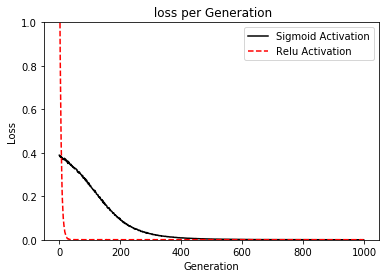

In [192]:
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title(' loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show() 